In [1]:
from spine_vision.io import read_medical_image, normalize_to_uint8
from spine_vision.datasets.classification import extract_middle_slice, resample_to_isotropic
from pathlib import Path
from PIL import Image
from IPython.display import display
import SimpleITK as sitk
import numpy as np
from loguru import logger

/home/nghiant/Github/spine-vision/.venv/lib/python3.11/site-packages/gdown/__init__.py:3: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [2]:
logger.remove()

# 1. DICOM

## Test Single Image

In [3]:
DATA_PATH = Path.cwd().parent / "data/interim/Phenikaa/images/250002076/SAG T2"

In [4]:
image = read_medical_image(DATA_PATH)
image = resample_to_isotropic(image, new_spacing=(0.5, 0.5, 0.5))
middle_slice = extract_middle_slice(image)

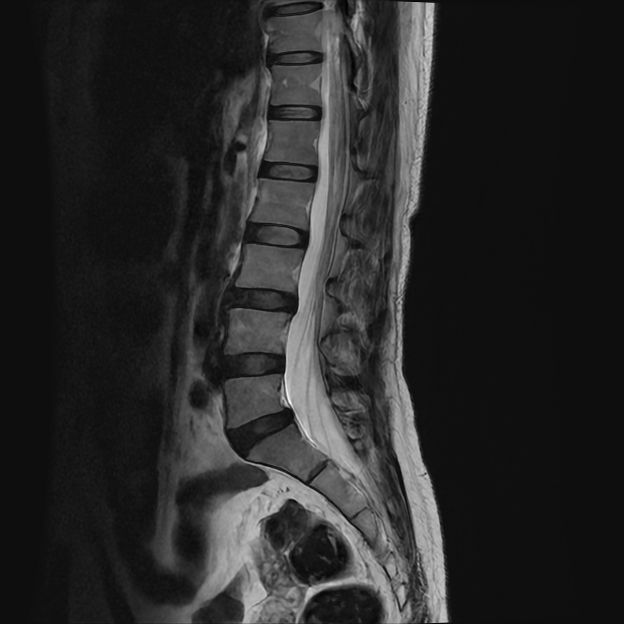

In [5]:
middle_slice = Image.fromarray(normalize_to_uint8(middle_slice)).convert("RGB")
display(middle_slice)

In [6]:
image.GetSpacing(), image.GetDirection()

((0.5, 0.5, 0.5),
 (-0.01345993780942187,
  -0.015840070429861727,
  -0.9997839377800303,
  0.999909204029851,
  0.0004300019119217514,
  -0.013468436982274049,
  0.0006432499951334456,
  -0.9998744457516316,
  0.01583284441630742))

## Test Image Directory

In [7]:
DATA_DIR = Path.cwd().parent / "data/interim/Phenikaa/images"
OUTPUT_DIR = Path.cwd() / "output/slice"
TARGET_SERIES_NAME = "SAG T2"

In [8]:
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)
patient_folders = [p for p in DATA_DIR.iterdir() if p.is_dir()]
for patient_folder in patient_folders:
    patient_id = patient_folder.name
    
    series_path = patient_folder / TARGET_SERIES_NAME
    
    if not series_path.exists():
        continue

    image = read_medical_image(series_path)
    image = resample_to_isotropic(image, new_spacing=(0.5, 0.5, 0.5))

    middle_slice = extract_middle_slice(image)
    
    output_filename = f"{patient_id}_SagT2.png"
    save_path = OUTPUT_DIR / output_filename
    
    Image.fromarray(normalize_to_uint8(middle_slice)).save(save_path)

ImageSeriesReader (0x5653ba33d180): Non uniform sampling or missing slices detected,  maximum nonuniformity:219.999



# 2. MHA

## Test Single Image

In [9]:
DATA_PATH = Path.cwd().parent / "data/raw/SPIDER/images/174_t2.mha"

In [10]:
image = read_medical_image(DATA_PATH)
image = resample_to_isotropic(image, new_spacing=(0.5, 0.5, 0.5))
middle_slice = extract_middle_slice(image)

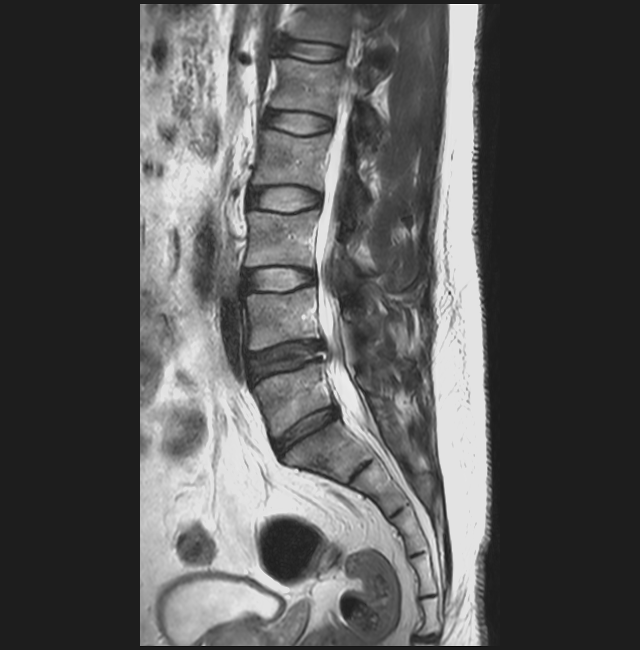

In [11]:
middle_slice = Image.fromarray(normalize_to_uint8(middle_slice)).convert("RGB")
display(middle_slice)

In [12]:
image.GetSpacing(), image.GetDirection()

((0.5, 0.5, 0.5), (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0))

## Test Image Directory

In [13]:
DATA_DIR = Path.cwd().parent / "data/raw/SPIDER/images"
OUTPUT_DIR = Path.cwd() / "output"
TARGET_SERIES_NAME = "t2"

In [14]:
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)
patient_files = [p for p in DATA_DIR.glob(f"*{TARGET_SERIES_NAME}.mha") if p.is_file()]
for patient_file in patient_files:
    patient_id = patient_file.stem

    image = read_medical_image(patient_file)
    image = resample_to_isotropic(image, new_spacing=(0.5, 0.5, 0.5))
    
    middle_slice = extract_middle_slice(image)

    output_filename = f"{patient_id}_SagT2.png"
    save_path = OUTPUT_DIR / output_filename

    Image.fromarray(normalize_to_uint8(middle_slice)).save(save_path)